In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from vega_datasets import data

In [2]:
sp_500 = data.sp500()
sp_500.head()

,date,price
0,2000-01-01,1394.46
1,2000-02-01,1366.42
2,2000-03-01,1498.58
3,2000-04-01,1452.43
4,2000-05-01,1420.60


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


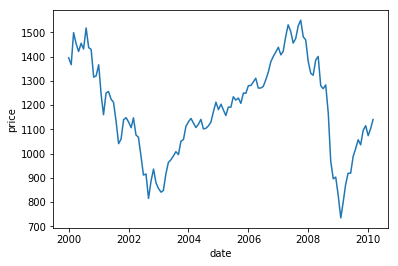

In [3]:
sns.lineplot(x='date',y='price',data=sp_500)
plt.show()

#Moving Averages

No handles with labels found to put in legend.


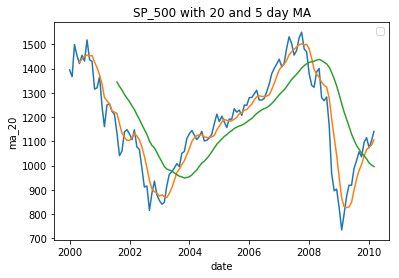

In [4]:
sp_500['ma_5'] = sp_500.price.rolling(5).mean()
sp_500['ma_20'] = sp_500.price.rolling(20).mean()

sns.lineplot(x='date',y='price',data=sp_500)
sns.lineplot(x='date',y='ma_5',data=sp_500)
sns.lineplot(x='date',y='ma_20',data=sp_500)
plt.legend()
plt.title('SP_500 with 20 and 5 day MA')
plt.show()

In [5]:
sp_500.set_index('date',inplace=True)
sp_500.head()

,price,ma_5,ma_20
date,,,
2000-01-01,1394.46,NaN,NaN
2000-02-01,1366.42,NaN,NaN
2000-03-01,1498.58,NaN,NaN
2000-04-01,1452.43,NaN,NaN
2000-05-01,1420.60,1426.498,NaN


In [6]:
stocks_data = data.stocks()
stocks_data.head()

,symbol,date,price
0,MSFT,2000-01-01,39.81
1,MSFT,2000-02-01,36.35
2,MSFT,2000-03-01,43.22
3,MSFT,2000-04-01,28.37
4,MSFT,2000-05-01,25.45


In [7]:
stocks_data.symbol.unique()

array(['MSFT', 'AMZN', 'IBM', 'GOOG', 'AAPL'], dtype=object)

In [8]:
stocks_data.symbol.value_counts()

AMZN    123
IBM     123
AAPL    123
MSFT    123
GOOG     68
Name: symbol, dtype: int64

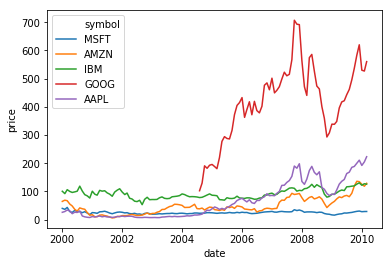

In [9]:
sns.lineplot(x='date',y='price',hue='symbol',data=stocks_data)

#Pivot 

In [10]:
stocks_pivoted= stocks_data.pivot(index='date',columns='symbol',values='price')

stocks_pivoted.head()

symbol,AAPL,AMZN,GOOG,IBM,MSFT
date,,,,,
2000-01-01,25.94,64.56,NaN,100.52,39.81
2000-02-01,28.66,68.87,NaN,92.11,36.35
2000-03-01,33.95,67.00,NaN,106.11,43.22
2000-04-01,31.01,55.19,NaN,99.95,28.37
2000-05-01,21.00,48.31,NaN,96.31,25.45


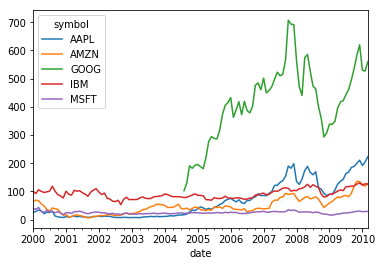

In [11]:
stocks_pivoted.plot()

In [19]:
tickers = stocks_pivoted.columns
tickers

Index(['AAPL', 'AMZN', 'GOOG', 'IBM', 'MSFT'], dtype='object', name='symbol')

#Melt (Changing data back to Original)

In [21]:
stocks_pivoted.reset_index(inplace=True)
stocks_pivoted.head()

symbol,index,date,AAPL,AMZN,GOOG,IBM,MSFT
0,0,2000-01-01,25.94,64.56,NaN,100.52,39.81
1,1,2000-02-01,28.66,68.87,NaN,92.11,36.35
2,2,2000-03-01,33.95,67.00,NaN,106.11,43.22
3,3,2000-04-01,31.01,55.19,NaN,99.95,28.37
4,4,2000-05-01,21.00,48.31,NaN,96.31,25.45


In [22]:
stock_data_melted = stocks_pivoted.melt(id_vars='date')
stock_data_melted.head()

,date,symbol,value
0,2000-01-01,index,0.0
1,2000-02-01,index,1.0
2,2000-03-01,index,2.0
3,2000-04-01,index,3.0
4,2000-05-01,index,4.0


#Percent Change

In [0]:
stocks_pivoted_pct =  stocks_pivoted.pct_change()
stocks_pivoted_pct.head()

In [0]:
stocks_cum_sum = stocks_pivoted_pct.cumsum()
stocks_cum_sum.head()

#Correlations

In [0]:
corr_matrix = stocks_pivoted_pct.corr()
corr_matrix

In [0]:
sns.heatmap(corr_matrix,annot=True)

#Barplot

In [14]:
tips_data = sns.load_dataset('tips')
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


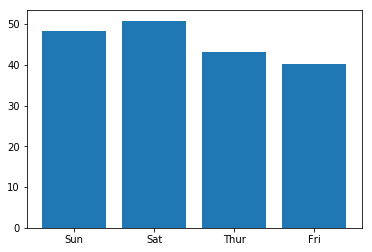

In [15]:
plt.bar(tips_data.day, tips_data.total_bill)
plt.show()

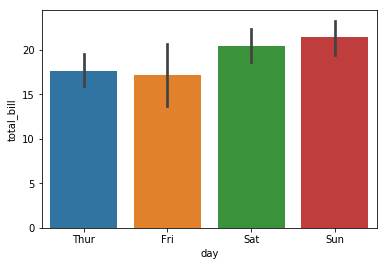

In [16]:
sns.barplot(x='day', y='total_bill', data=tips_data)

#Distributions

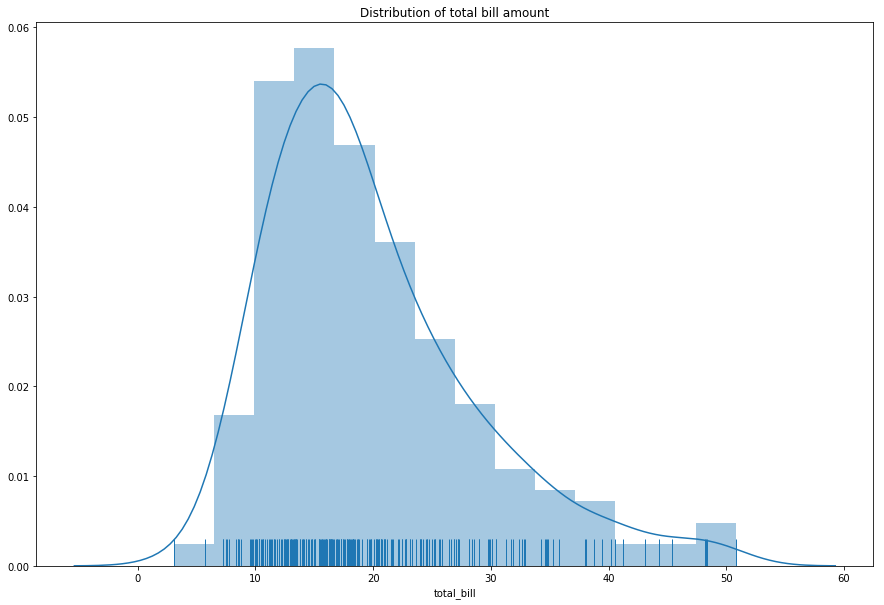

In [17]:
plt.figure(figsize=(15, 10))
sns.distplot(tips_data.total_bill, kde=True, rug=True)
plt.title('Distribution of total bill amount')
plt.show()